In [38]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split

<h2> Loading Data <h2>

In [71]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]
### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.026315786911357334 0.0054898300284884965 0.14265335235378032 ... 0 0
  0]
 [0.01315789213988919 0.034672810123588256 0.12981455064194009 ... 1 0 0]
 [0.03684210272853185 0.036470845767969384 0.12410841654778887 ... 0 0 0]
 ...
 [0.07894736599722992 0.04154784034676985 0.11412268188302425 ... 0 0 0]
 [0.1052631555401662 0.045957093100441285 0.16833095577746077 ... 1 0 0]
 [0.022368418479916892 0.015071379464132482 0.10699001426533523 ... 0 1 0]] ['Good' 'Good' 'Bad' ... 'Bad' 'Good' 'Bad']
5253 5253 1314 1314


<h2> Decision Tree Classifier <h2>

In [75]:
###Classify using decision tree (DT) classifer

from sklearn.tree import DecisionTreeClassifier #import the DT classifier

clf1 = DecisionTreeClassifier(min_samples_split=20) #declare a DT classifier
clf1.fit(X_train, y_train); #train the classifier

print (clf1.score (X_test, y_test)); # print the prediction score(accuracy)
print (clf1.score (X_train, y_train)); # print the trainig score(accuracy)


0.6362252663622526
0.834380354083381


[[381 197]
 [281 455]]
              precision    recall  f1-score   support

         Bad       0.58      0.66      0.61       578
        Good       0.70      0.62      0.66       736

    accuracy                           0.64      1314
   macro avg       0.64      0.64      0.64      1314
weighted avg       0.64      0.64      0.64      1314



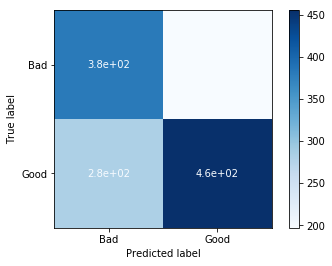

In [78]:
labels =['Bad','Good','Very_Bad','Very_Good']
y_pred =clf1.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf1, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

In [74]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.externals.six import StringIO  
import pydot 

dot_data = StringIO() 
features =['budget', 'popularity', 'runtime', 'Action','Adventure', 'Comedy', 'Crime', 'Drama', 'Horror', 'Thriller']
tree.export_graphviz(clf1, out_file=dot_data, feature_names = features) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

graph[0].write_pdf("testTree.pdf")  # must access graph's first element